In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
#spinup year
start1 = '2015-01-01'
end1 = '2015-11-25'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,11,25)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_1st = np.arange(y_st,y_en+1,1)


#2nd 2015 year
start2 = '2015-01-01'
end2 = '2015-11-25'

st2 = dt.datetime(2015,1,1)
en2 = dt.datetime(2015,11,25)
y_st2 = st2.timetuple().tm_yday
print(y_st2)
y_en2 = en2.timetuple().tm_yday
print(y_en2)
ts_2nd = np.arange(y_st2,y_en2+1,1)


sdir_1 = '/data/tjarniko/results/PREIND_1st_2015/ncs/'
sdir_2 = '/data/tjarniko/results/PREIND_2nd_2015/PI_2/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

1
329
1
329


In [5]:
def make_nclen(start,end,ftype, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    dayslen = len(arrow_array)

    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_T_' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
#         print(tnc_sens)
        sens_ar.append(tnc_sens[0])
        
    return sens_ar

In [6]:
sens_ar_1st = make_nclen(start1,end1,'carp', sdir_1)
sens_ar_2nd = make_nclen(start2,end2,'carp', sdir_2)
sens_ar_1st_grid = make_nclen(start1,end1,'grid', sdir_1)
sens_ar_2nd_grid = make_nclen(start2,end2,'grid', sdir_2)
sens_ar_1st_ptrc = make_nclen(start1,end1,'ptrc', sdir_1)
sens_ar_2nd_ptrc = make_nclen(start2,end2,'ptrc', sdir_2)
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

In [7]:
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
t_surfa = udir*vdir



In [8]:
def combine_files_surfa(files, surfa, var):
    stor_mol = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables[var][0,0,:,:]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = var_tmp * surfa
        totdic = np.sum(np.sum(var_tmp2))
        totdic_mols = totdic * (1/1000)
#         print(totflux)
        
        stor_mol[i] = totdic_mols
        i = i+1
    return stor_mol

In [9]:
surf_dic_1st = combine_files_surfa(sens_ar_1st,t_surfa, 'dissolved_inorganic_carbon')
surf_dic_2nd = combine_files_surfa(sens_ar_2nd,t_surfa, 'dissolved_inorganic_carbon')
surf_sal_1st = combine_files_surfa(sens_ar_1st_grid,t_surfa, 'vosaline')
surf_sal_2nd = combine_files_surfa(sens_ar_2nd_grid,t_surfa, 'vosaline')
surf_nit_1st = combine_files_surfa(sens_ar_1st_ptrc,t_surfa, 'nitrate')
surf_nit_2nd = combine_files_surfa(sens_ar_2nd_ptrc,t_surfa, 'nitrate')



0


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


50
100
150
200
250
300
0
50
100
150
200
250
300
0
50
100
150
200
250
300
0
50
100
150
200
250
300
0
50
100
150
200
250
300
0
50
100
150
200
250
300


In [10]:
ncname = 'PI_2015_to1125_spinup.nc'
f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
#g.createDimension('days', len(NO3_mod))
g.createDimension('days', y_en2)
ts = g.createVariable('surf_dic_1st','f4',('days'))
ts[:] = surf_dic_1st
ts2 = g.createVariable('surf_dic_2nd','f4',('days'))
ts2[:] = surf_dic_2nd
ts3 = g.createVariable('surf_sal_1st','f4',('days'))
ts3[:] = surf_sal_1st
ts4 = g.createVariable('surf_sal_2nd','f4',('days'))
ts4[:] = surf_sal_2nd
ts5 = g.createVariable('surf_nit_1st','f4',('days'))
ts5[:] = surf_nit_1st
ts6 = g.createVariable('surf_nit_2nd','f4',('days'))
ts6[:] = surf_nit_2nd
f.close()

In [11]:
w =nc.Dataset('PI_2015_to1125_spinup.nc')
surf_dic_1st = w['model_output']['surf_dic_1st'][:]
surf_dic_2nd = w['model_output']['surf_dic_2nd'][:]
surf_nit_1st = w['model_output']['surf_nit_1st'][:]
surf_nit_2nd = w['model_output']['surf_nit_2nd'][:]
surf_sal_1st = w['model_output']['surf_sal_1st'][:]
surf_sal_2nd = w['model_output']['surf_sal_2nd'][:]

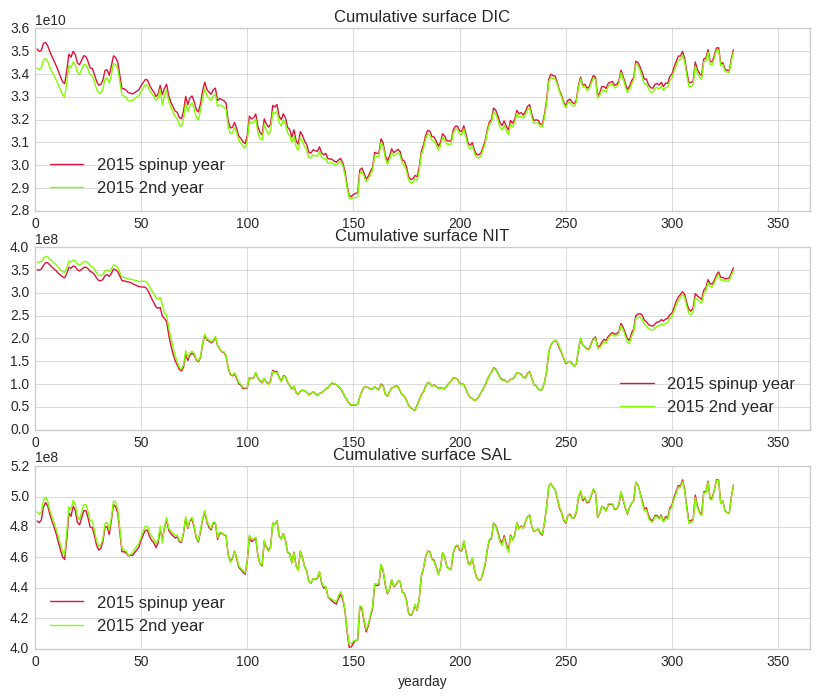

In [12]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_1st,surf_dic_1st,color = 'crimson',label = '2015 spinup year')
ax.plot(ts_2nd,surf_dic_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('DIC surface mass balance (summed over whole strait)')

plt.xlim([0,365])
plt.title('Cumulative surface DIC')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_1st,surf_nit_1st,color = 'crimson',label = '2015 spinup year')
ax.plot(ts_2nd,surf_nit_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('NIT surface mass balance (summed over whole strait)')

plt.xlim([0,365])
plt.title('Cumulative surface NIT')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_1st,surf_sal_1st,color = 'crimson',label = '2015 spinup year')
ax.plot(ts_2nd,surf_sal_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('SAL surface mass balance (summed over whole strait)')
plt.xlabel('yearday')
plt.xlim([0,365])
plt.title('Cumulative surface SAL')
 

#fig.suptitle('Cumulative surface DIC', fontsize = 20)
plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


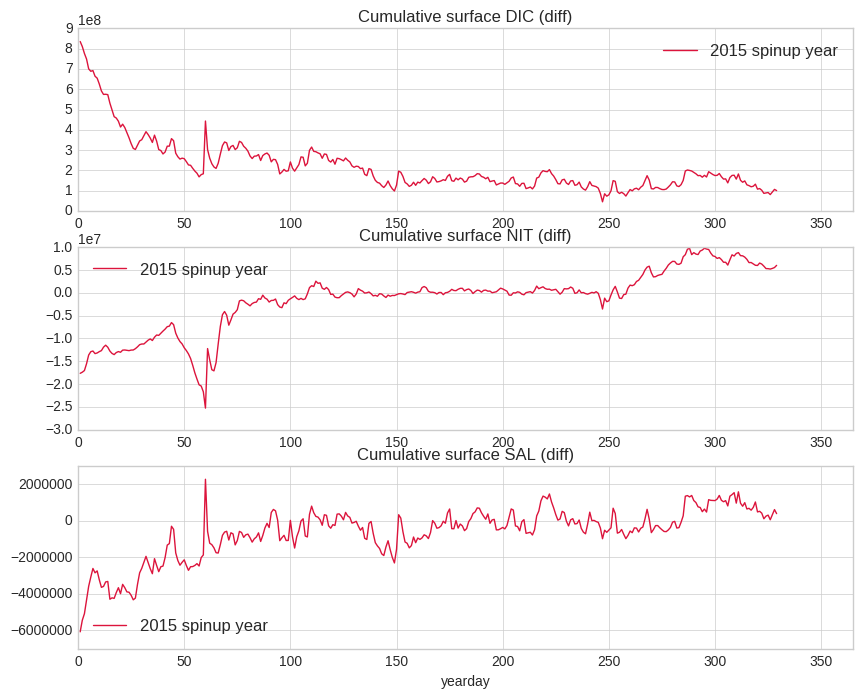

In [13]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_1st,surf_dic_1st-surf_dic_2nd,color = 'crimson',label = '2015 spinup year')
#ax.plot(ts_2nd,surf_dic_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('DIC surface mass balance (summed over whole strait)')

plt.xlim([0,365])
plt.title('Cumulative surface DIC (diff)')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_1st,surf_nit_1st-surf_nit_2nd,color = 'crimson',label = '2015 spinup year')
#ax.plot(ts_2nd,surf_nit_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('NIT surface mass balance (summed over whole strait)')

plt.xlim([0,365])
plt.title('Cumulative surface NIT (diff)')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_1st,surf_sal_1st-surf_sal_2nd,color = 'crimson',label = '2015 spinup year')
#ax.plot(ts_2nd,surf_sal_2nd,color = 'chartreuse', label = '2015 2nd year')
ax.legend(loc = 'best')
#plt.ylabel('SAL surface mass balance (summed over whole strait)')
plt.xlabel('yearday')
plt.xlim([0,365])
plt.title('Cumulative surface SAL (diff)')
 

#fig.suptitle('Cumulative surface DIC', fontsize = 20)
plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)
